In [1]:
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
shape_tuple = (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], *shape_tuple))
test_images = test_images.reshape((test_images.shape[0], *shape_tuple))


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
def print_list(arr):
    s = ""
    for i in arr:
        s += str(float(i)) + ", "
    return s

In [0]:

nn_model = Sequential([
    Flatten(),
    Dense(8192, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])


#score = nn_model.evaluate(x_validate, y_validate, verbose=0)
#print(score)
#score = nn_model.evaluate(test_images, test_labels, verbose=0)
#print(score)


In [17]:
lr = 0.002
batch_size = 4096
epochs = 50
itr = 20
in_itr = 5
validation_ratio = 0.1
plot_x = np.ndarray((itr), dtype=float)
plot_loss = np.ndarray((itr), dtype=float)
plot_acc = np.ndarray((itr), dtype=float)

for i in range(itr) :
    plot_x[i] = validation_ratio
    plot_acc[i] = 0
    plot_loss[i] = 0
    for j in range(in_itr):
        x_train, x_validate, y_train, y_validate = train_test_split(
            train_images, train_labels, test_size=validation_ratio, random_state=12345,
        )
        
        nn_model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy']
        )
        nn_model.fit(
            x_train, y_train, batch_size=batch_size,
            epochs = epochs, verbose=0,
            validation_data=(x_validate, y_validate)
        )
        #score = cnn_model.evaluate(x_validate, y_validate, verbose=0)
        score = nn_model.evaluate(test_images, test_labels, verbose=0)
        plot_acc[i] += score[1]
        plot_loss[i] += score[0]
    plot_acc[i] /= in_itr
    plot_loss[i] /= in_itr
    #print(lr)
    #print(score[1])
    #print(score[0])
    validation_ratio += 0.01

print(print_list(plot_x))
print(print_list(plot_acc))
print(print_list(plot_loss))

0.1, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.18000000000000005, 0.19000000000000006, 0.20000000000000007, 0.21000000000000008, 0.22000000000000008, 0.2300000000000001, 0.2400000000000001, 0.2500000000000001, 0.2600000000000001, 0.27000000000000013, 0.28000000000000014, 0.29000000000000015, 
0.9052, 0.90356, 0.90532, 0.9044000000000001, 0.9036799999999999, 0.9035399999999999, 0.9036799999999999, 0.9032399999999999, 0.9022400000000002, 0.90358, 0.9044800000000001, 0.9036199999999999, 0.9051400000000001, 0.9024600000000002, 0.90242, 0.9039200000000001, 0.9037599999999999, 0.9036799999999999, 0.90478, 0.90302, 
0.7588190223321881, 0.7750645940658479, 0.8431649861381219, 0.8561151609215829, 0.8883125110610439, 0.9019563237803604, 0.9108949941993707, 0.928327652043912, 0.9914487027626423, 0.9556482669048016, 0.9778969455225488, 1.0075500922985363, 0.998773487590328, 1.0298342018322955, 1.0505912278857117, 1.0531760883577266, 1.0484391504553945

In [11]:
vr = 0.1
v = np.ndarray((20), dtype=float)
for i in range(20):
    v[i] = vr
    vr += 0.01
print_list(v)

'0.1, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.18000000000000005, 0.19000000000000006, 0.20000000000000007, 0.21000000000000008, 0.22000000000000008, 0.2300000000000001, 0.2400000000000001, 0.2500000000000001, 0.2600000000000001, 0.27000000000000013, 0.28000000000000014, 0.29000000000000015, '

In [0]:
x = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.18000000000000005, 0.19000000000000006, 0.20000000000000007, 0.21000000000000008, 0.22000000000000008, 0.2300000000000001, 0.2400000000000001, 0.2500000000000001, 0.2600000000000001, 0.27000000000000013, 0.28000000000000014, 0.29000000000000015]
y_acc = [0.9032, 0.90356, 0.90332, 0.9044000000000001, 0.9036799999999999, 0.9035399999999999, 0.9036799999999999, 0.9032399999999999, 0.9022400000000002, 0.90358, 0.9049800000000001, 0.9046199999999999, 0.9051400000000001, 0.9024600000000002, 0.90242, 0.9039200000000001, 0.9037599999999999, 0.9036799999999999, 0.90478, 0.90302]
y_loss = [0.7588190223321881, 0.7750645940658479, 0.8431649861381219, 0.8561151609215829, 0.8883125110610439, 0.9019563237803604, 0.9108949941993707, 0.928327652043912, 0.9914487027626423, 0.9556482669048016, 0.9778969455225488, 1.0075500922985363, 0.998773487590328, 1.0298342018322955, 1.0505912278857117, 1.0531760883577266, 1.0484391504553945, 1.0642614592890278, 1.0673090824989129, 1.0832031883655562]

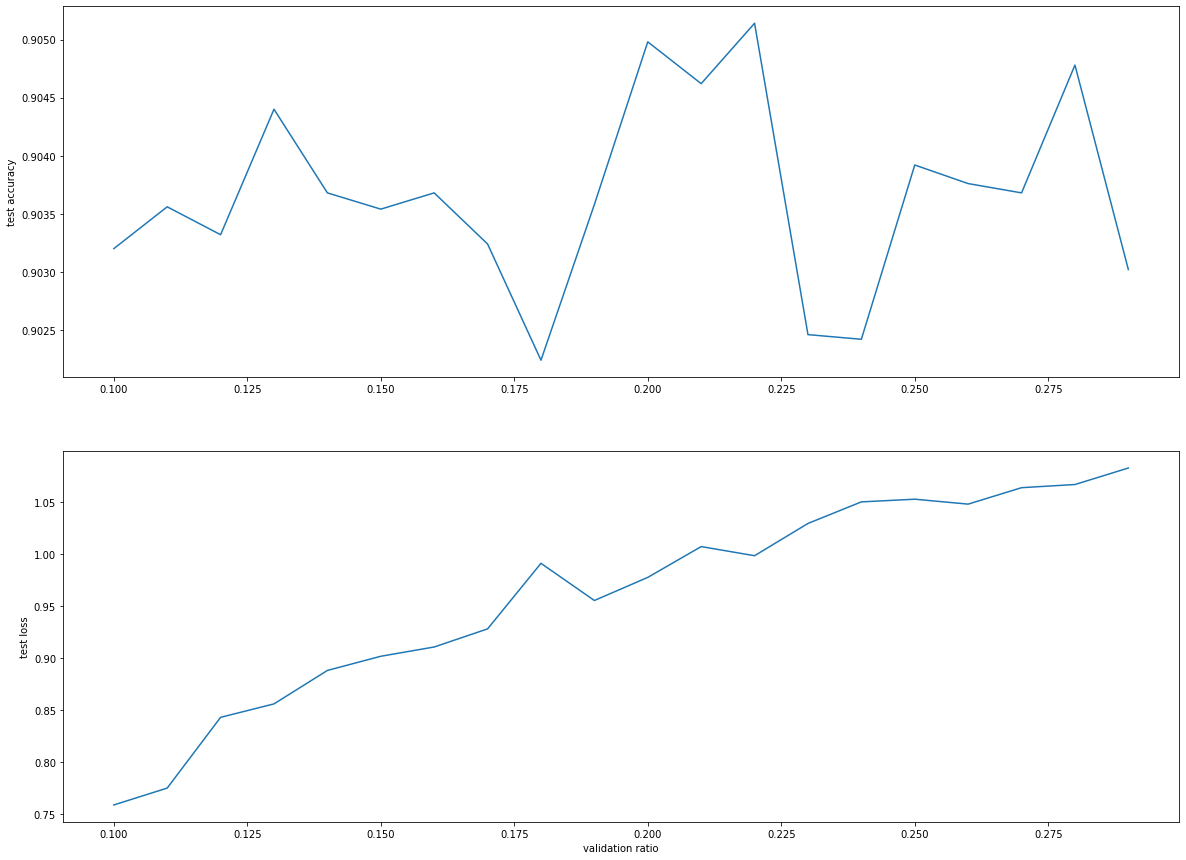

In [23]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 15))


ax1.plot(x, y_acc)
ax2.plot(x, y_loss)
ax1.set_ylabel('test accuracy')
ax2.set_ylabel('test loss')
ax2.set_xlabel('validation ratio')
plt.show()